<a href="https://colab.research.google.com/github/armandovicencio/Datascience-Challenge2/blob/main/TelecomX2_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análisis de Predicción de Churn de Clientes



Montar proyecto en Drive

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Instalación de Bibliotecas



In [65]:
!pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

Lectura de Archivo

In [67]:
datos = pd.read_csv('/content/drive/MyDrive/datos_tratados.csv')
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [68]:
datos.value_counts(normalize=True)

,,,,,,,,,,,,,,,,,,,,,proportion
customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,
9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6,0.000142
0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3,0.000142
0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4,0.000142
9970-QBCDA,No,Female,0,No,No,6,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),19.70,129.55,0.000142
9968-FFVVH,No,Male,0,No,No,63,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,No,One year,No,Bank transfer (automatic),68.80,4111.35,0.000142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,Yes,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.8,0.000142
0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25,0.000142
0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45,0.000142


Eliminación de Columnas Irrelevantes

In [69]:
datos= datos.drop('customerID', axis = 1)

In [70]:
datos['Charges.Total'] = pd.to_numeric(datos['Charges.Total'], errors='coerce')
# Drop rows with missing values
datos.dropna(inplace=True)

In [71]:


datos.head(5)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [72]:
import plotly.express as px

fig = px.histogram(datos, x = 'Churn', text_auto=True, color = 'Churn')

fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig.show()

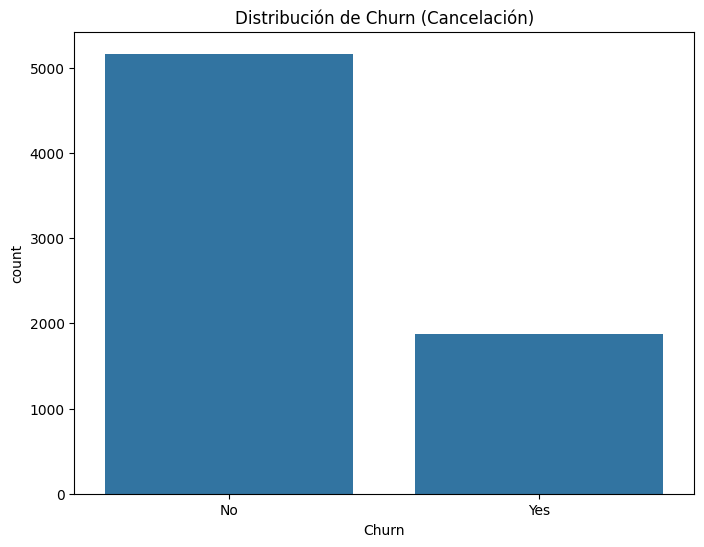

,proportion
Churn,
No,0.734215
Yes,0.265785


In [73]:
# Distribución de la variable objetivo
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=datos)
plt.title('Distribución de Churn (Cancelación)')
plt.show()

# Proporciones
churn_counts = datos['Churn'].value_counts(normalize=True)
churn_counts


Analisis de Variables Categóricas


In [74]:
# Lista de variables categóricas
import plotly.express as px
cat_cols = ['gender',  'Partner', 'Dependents', 'PhoneService',
            'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod']

# Visualización de distribución por Churn
for col in cat_cols:
    fig = px.histogram(datos, x=col, color='Churn', barmode='group', text_auto=True)


    fig.update_traces(textposition='outside')
    fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

    fig.show()


Análisis de Variables Numéricas

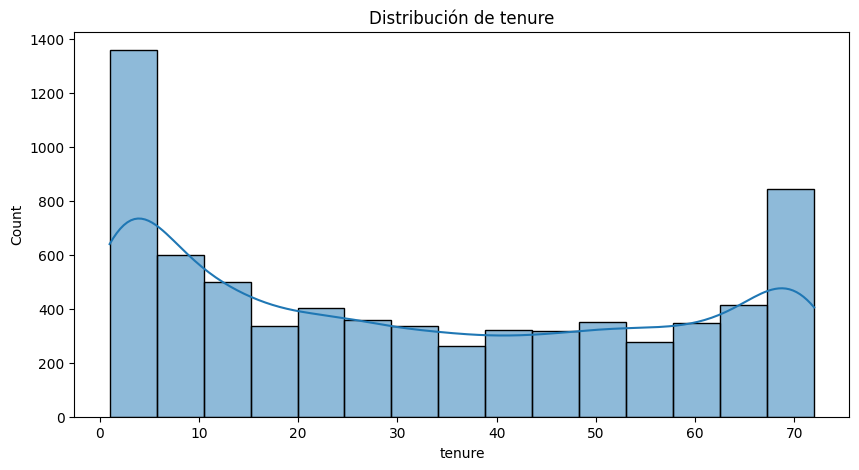

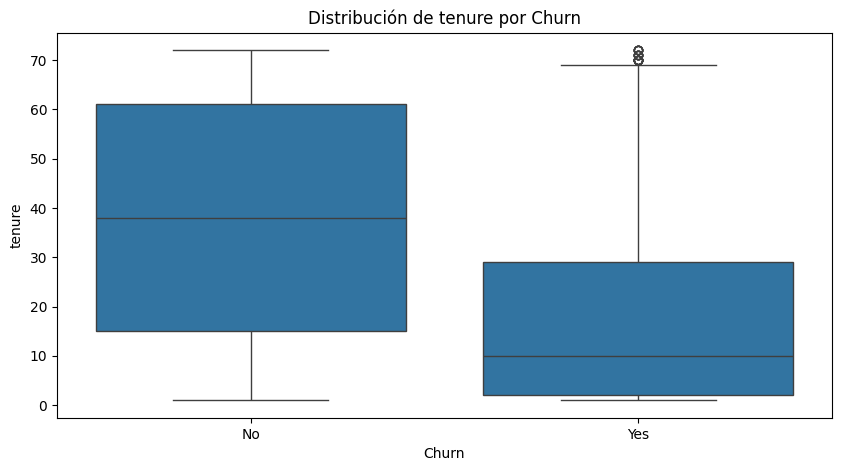

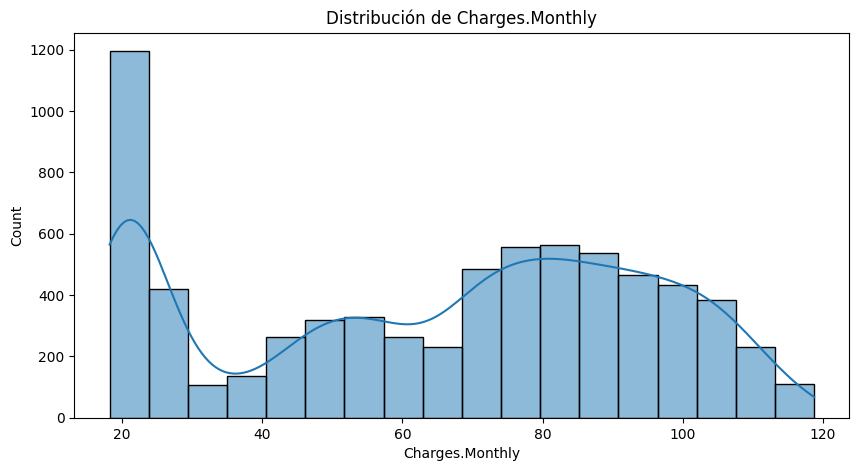

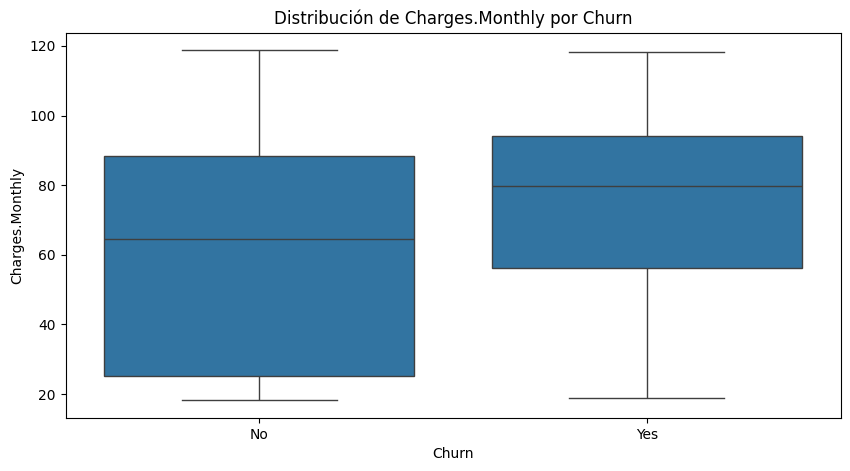

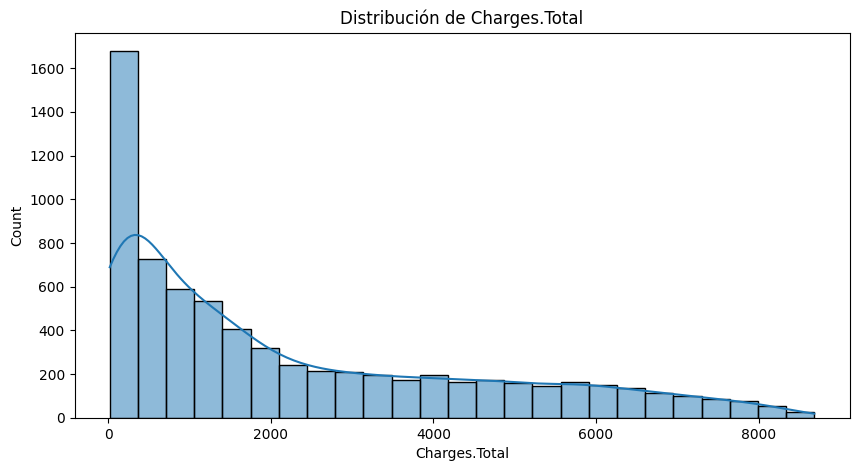

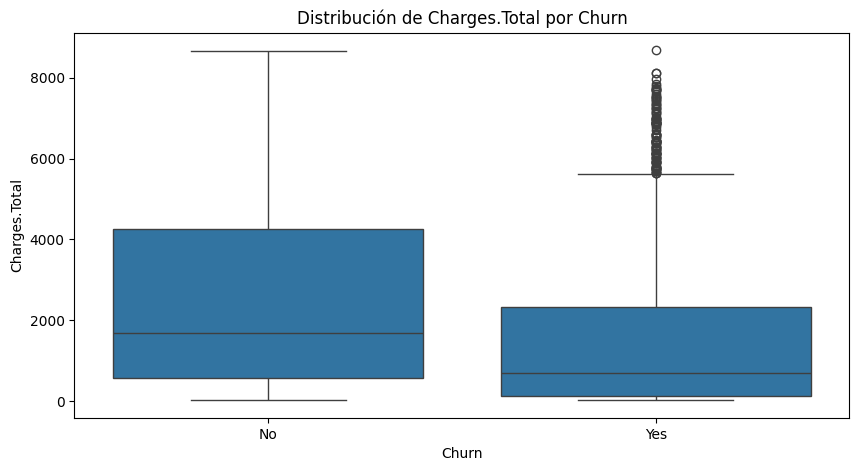

In [75]:
# Lista de variables numéricas
num_cols = ['tenure', 'Charges.Monthly', 'Charges.Total']

# Distribución de variables numéricas
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(datos[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()

    # Boxplot por Churn
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Churn', y=col, data=datos)
    plt.title(f'Distribución de {col} por Churn')
    plt.show()

**Correlación**

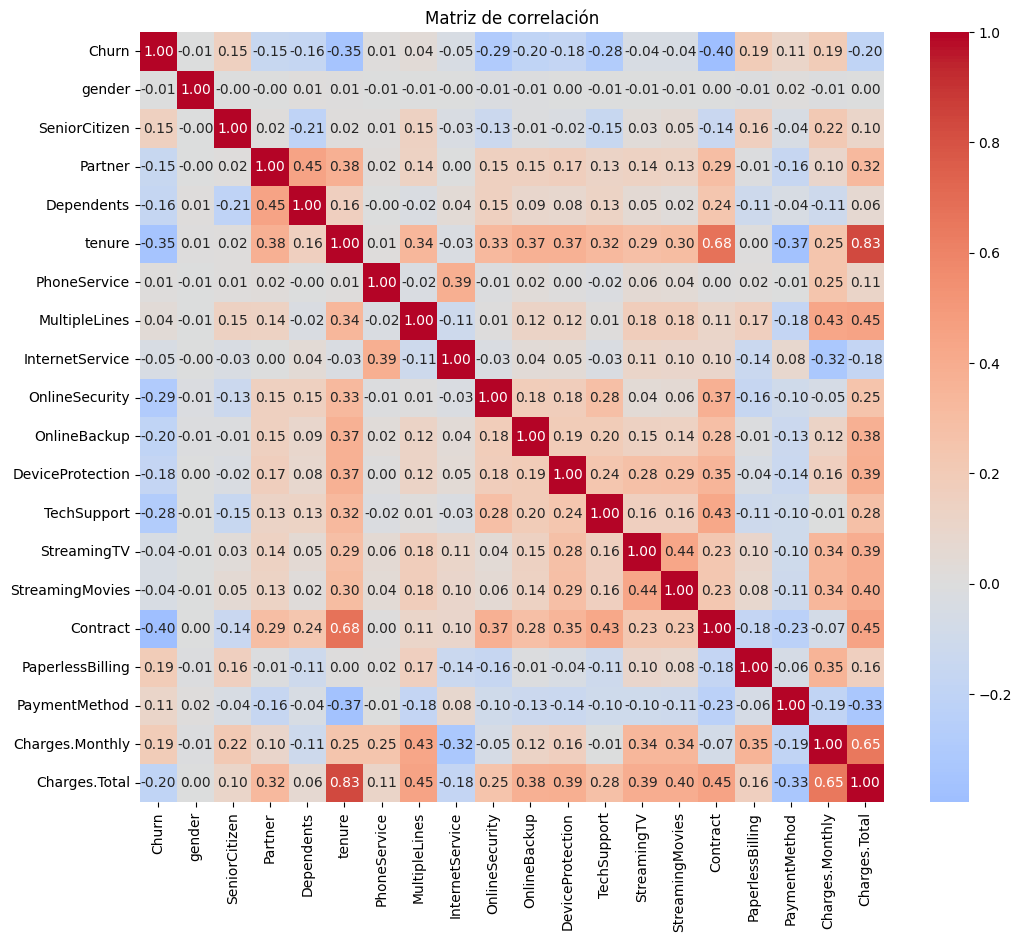


Correlaciones con Churn:
Churn               1.000000
Charges.Monthly     0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
Charges.Total      -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64


In [76]:
# Codificación de variables categóricas para matriz de correlación
df_encoded = datos.copy()
le = LabelEncoder()
for col in datos.select_dtypes(include=['object']).columns:
    df_encoded[col] = le.fit_transform(datos[col].astype(str))

# Matriz de correlación
plt.figure(figsize=(12, 10))
corr = df_encoded.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Matriz de correlación')
plt.show()

# Correlaciones con Churn
print("\nCorrelaciones con Churn:")
print(corr['Churn'].sort_values(ascending=False))

In [77]:
datos['Churn'].map({'Yes': 1, 'No': 0})



,Churn
0,0
1,0
2,1
3,1
4,1
...,...
7262,0
7263,1
7264,0
7265,0


In [78]:
# Características y variable objetivo
X = datos.drop('Churn', axis=1)
y = datos['Churn']


In [79]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [80]:
columnas = X.columns
columnas


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total'],
      dtype='object')

In [81]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['gender',  'Partner', 'Dependents', 'PhoneService',
     'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
     'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
     'Contract', 'PaperlessBilling', 'PaymentMethod']
),
    remainder = 'passthrough',
    sparse_threshold=0,
    force_int_remainder_cols=False)

In [82]:
X = one_hot.fit_transform(X)

In [83]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__gender_Male', 'onehotencoder__Partner_Yes',
       'onehotencoder__Dependents_Yes', 'onehotencoder__PhoneService_Yes',
       'onehotencoder__MultipleLines_No',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No',
       'onehotencoder__OnlineSecurity_No',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineSecurity_Yes',
       'onehotencoder__OnlineBackup_No',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__OnlineBackup_Yes',
       'onehotencoder__DeviceProtection_No',
       'onehotencoder__DeviceProtection_No internet service',
       'onehotencoder__DeviceProtection_Yes',
       'onehotencoder__TechSupport_No',
       'onehotencoder__TechSupport_No internet service',
       'onehotencoder__TechSupport_Ye

In [84]:
pd.DataFrame(X, columns = one_hot.get_feature_names_out(columnas))

,onehotencoder__gender_Male,onehotencoder__Partner_Yes,onehotencoder__Dependents_Yes,onehotencoder__PhoneService_Yes,onehotencoder__MultipleLines_No,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,...,onehotencoder__Contract_Two year,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,remainder__SeniorCitizen,remainder__tenure,remainder__Charges.Monthly,remainder__Charges.Total
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,9.0,65.60,593.30
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,59.90,542.40
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,73.90,280.85
3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,13.0,98.00,1237.85
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.0,55.15,742.90
7028,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,22.0,85.10,1873.70
7029,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,50.30,92.75
7030,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,67.0,67.85,4627.65


In [85]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([0, 0, 1, ..., 0, 0, 0])

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3 , stratify = y,  random_state = 5)
X,X_test,y,y_test = train_test_split(X,y,test_size=0.30,stratify=y,random_state=5)
X_train,X_val,y_train,y_val = train_test_split(X,y,stratify=y,random_state=5)

In [88]:
from sklearn.dummy import DummyClassifier

In [89]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

dummy.score(X_test, y_test)

0.7341232227488151

**Oversampling**

In [90]:
from imblearn.over_sampling import SMOTE

In [91]:
oversampling = SMOTE()
X_balanceada,y_balanceada = oversampling.fit_resample(X,y)

In [92]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [94]:
modelo_arbol = DecisionTreeClassifier(random_state =5)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5)

In [95]:
modelo_arbol.predict(X_test)

array([1, 1, 1, ..., 0, 1, 1])

In [96]:
modelo_arbol.score(X_train, y_train)

0.999729070712544

In [97]:
modelo_arbol.score(X_test, y_test)

0.728909952606635

In [98]:
modelo_arbol.score(X_val,y_val)

0.7392363931762794

Normalizando los datospara para entrenar modelo KNN

In [99]:
from sklearn.preprocessing import MinMaxScaler

In [100]:
normalizacion = MinMaxScaler()
X_train_normalizado = normalizacion.fit_transform(X_train)

In [101]:
pd.DataFrame(X_train_normalizado)

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.985915,0.285501,0.374960
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.513702,0.005905
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.676056,0.558545,0.427920
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.084507,0.793722,0.080215
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.084507,0.753861,0.071022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3686,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.887324,0.313403,0.368806
3687,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.225352,0.817638,0.185310
3688,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.253521,0.772297,0.203274
3689,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.746479,0.466866,0.405739


KNN

In [102]:
from sklearn.neighbors import KNeighborsClassifier

In [103]:
knn = KNeighborsClassifier()

In [104]:
knn.fit(X_train_normalizado, y_train)

KNeighborsClassifier()

In [105]:
X_test_normalizado = normalizacion.transform(X_test)

In [106]:
knn.score(X_test_normalizado, y_test)

0.7601895734597156

In [107]:
print(f'Exactitud Dummy: {dummy.score(X_test, y_test)}')
print(f'Exactitud modelo_arbol: {modelo_arbol.score(X_test, y_test)}')
print(f'Exactitud KNN: {knn.score(X_test_normalizado, y_test)}')

Exactitud Dummy: 0.7341232227488151
Exactitud modelo_arbol: 0.728909952606635
Exactitud KNN: 0.7601895734597156


Exportar Modelo Seleccionado

In [108]:
import pickle

In [109]:
with open('modelo_champion.pkl', 'wb') as archivo:
    pickle.dump(knn, archivo)

Análisis de Correlaciones

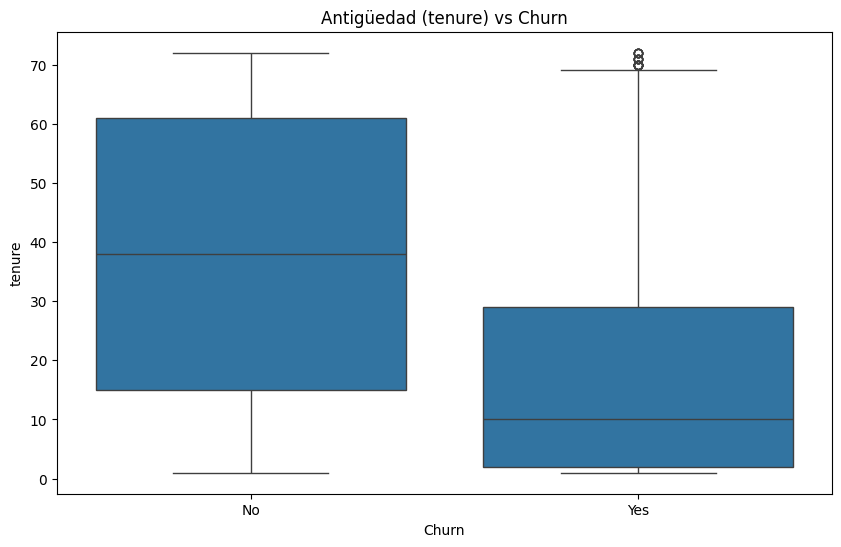

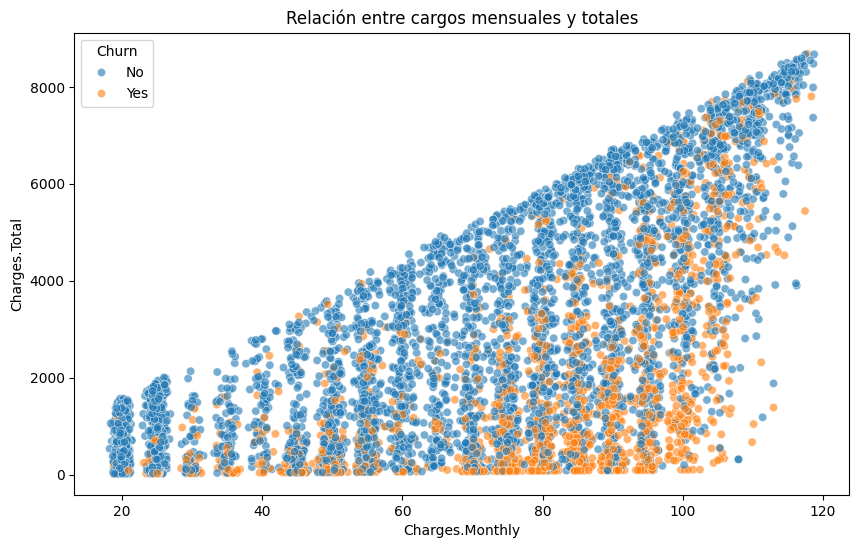

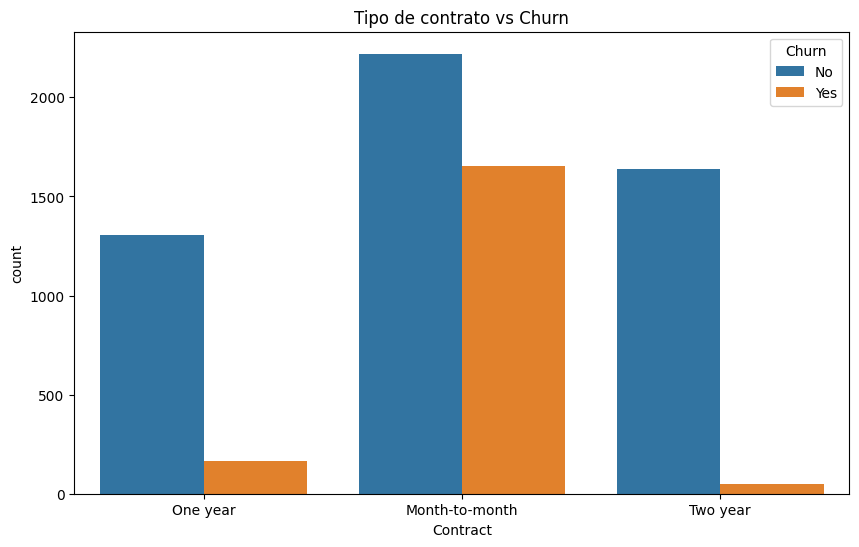

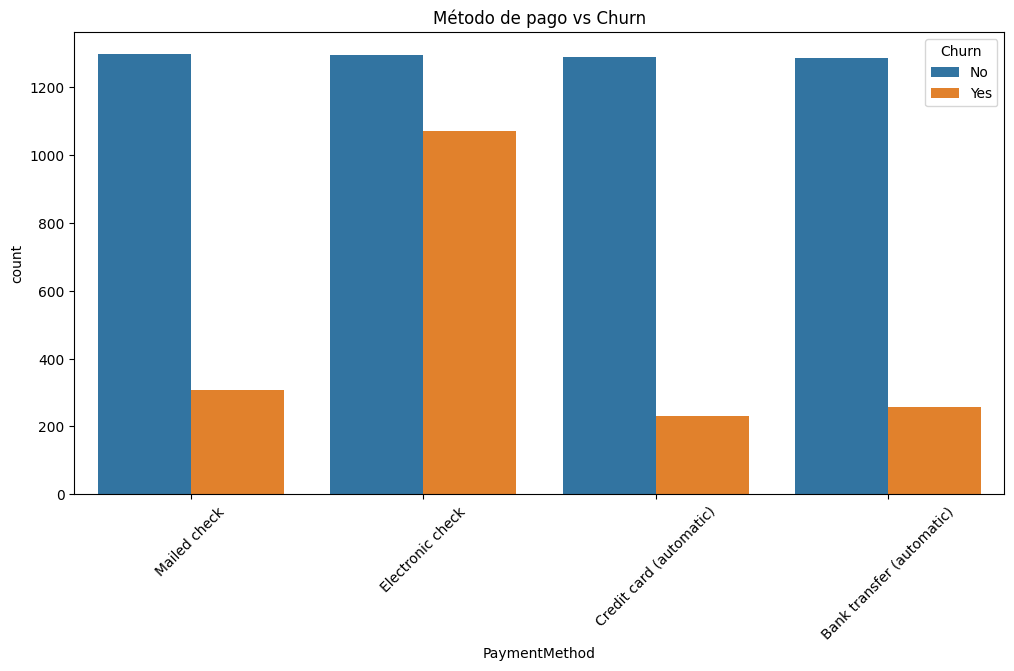

In [110]:
# Relación entre tenure y Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=datos)
plt.title('Antigüedad (tenure) vs Churn')
plt.show()

# Relación entre cargos mensuales y totales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Charges.Monthly', y='Charges.Total', hue='Churn', data=datos, alpha=0.6)
plt.title('Relación entre cargos mensuales y totales')
plt.show()

# Distribución de Contract vs Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=datos)
plt.title('Tipo de contrato vs Churn')
plt.show()

# Distribución de PaymentMethod vs Churn
plt.figure(figsize=(12, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=datos)
plt.xticks(rotation=45)
plt.title('Método de pago vs Churn')
plt.show()

Conclusiones EstratégicasFactores Clave que Influyen en Churn:
1. tenure: Los clientes con menor permanencia (menor a 10 meses) son más propensos a cancelar.
2. Charges.Total: Los clientes con cargos totales elevados tienen mayor riesgo de cancelación.
3. Contract_Month-to-month: Los contratos mensuales son un factor de riesgo significativo.
4. InternetService_Fiber optic: Los clientes con fibra óptica muestran mayor propensión a cancelar, posiblemente debido a costos o problemas de servicio.

Rendimiento de los Modelos:El modelo KNN esa el mejor modelo con una exactitud de 0.76.

                  Estrategias de Retención

Clientes con bajo tenure: Implementar programas de lealtad, descuentos iniciales o soporte personalizado para nuevos clientes.

Clientes con altos Charges.Total: Ofrecer planes más económicos o descuentos para reducir la percepción de costos elevados.

Clientes con InternetService_Fiber optic: Mejorar la calidad del servicio de fibra óptica y el soporte técnico.

Clientes con Contract_Month-to-month: Incentivar contratos a largo plazo (1 o 2 años) con beneficios adicionales.

